# 캘리포니아의 집값 예측하기
- 데이터셋:california_housing.csv
- 목적: 집값 예측
- 피쳐: 8개
- 타겟: median_house_value
- 학습방법: 지도학습 - 회귀
- 알고리즘: LinearRegression

longitude : 경도  
latitude : 위도  
housing_median_age : 주택 나이(중앙값)  
total_rooms : 전체 방 수  
total_bedrooms : 전체 침실 수  
population : 인구 수  
households : 세대 수  
median_income : 소득(중앙값)  
median_house_value : 주택 가치(중앙값)  

[1] 모듈 준비

In [1]:
# 모듈 로딩
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터준비

In [4]:
file_path = 'california_housing.csv'

In [5]:
df= pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


[2-2] 결측치 제거

In [5]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

[2-3] 중복값 확인

In [6]:
df.duplicated().sum()

np.int64(0)

[2-4] 이상치 확인

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# 박스플롯을 잘 나타내기위해서로그변환
df_log = np.log1p(df)

c:\새 폴더\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


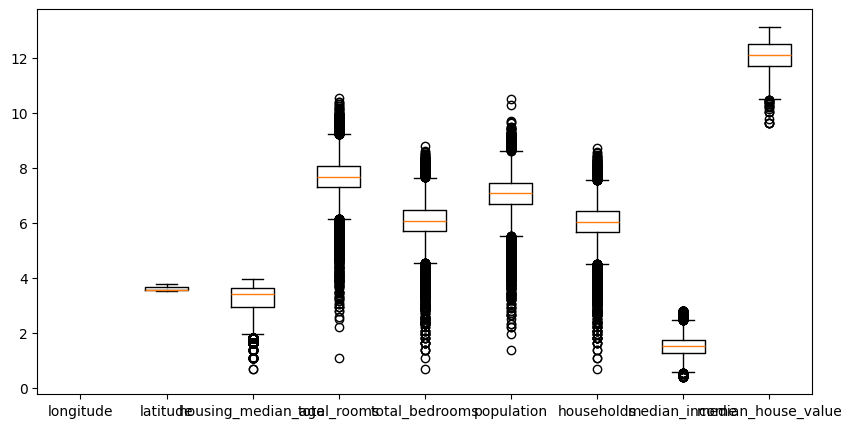

In [9]:
# 박스플롯
plt.figure(figsize = (10, 5))
plt.boxplot(df_log.iloc[:, :9])
plt.xticks(np.arange(1,10), df.columns[:9])
plt.show()

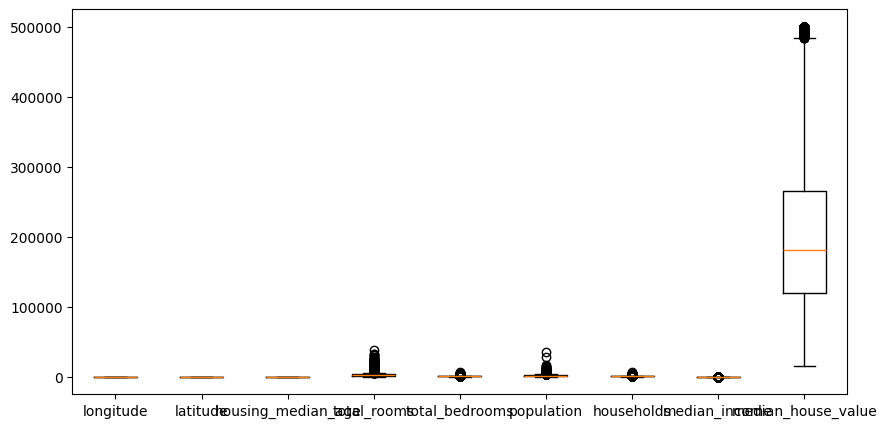

In [10]:
# 박스플롯
plt.figure(figsize = (10, 5))
plt.boxplot(df.iloc[:, :9])
plt.xticks(np.arange(1,10), df.columns[:9])
plt.show()

[3] 상관관계 분석

In [11]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


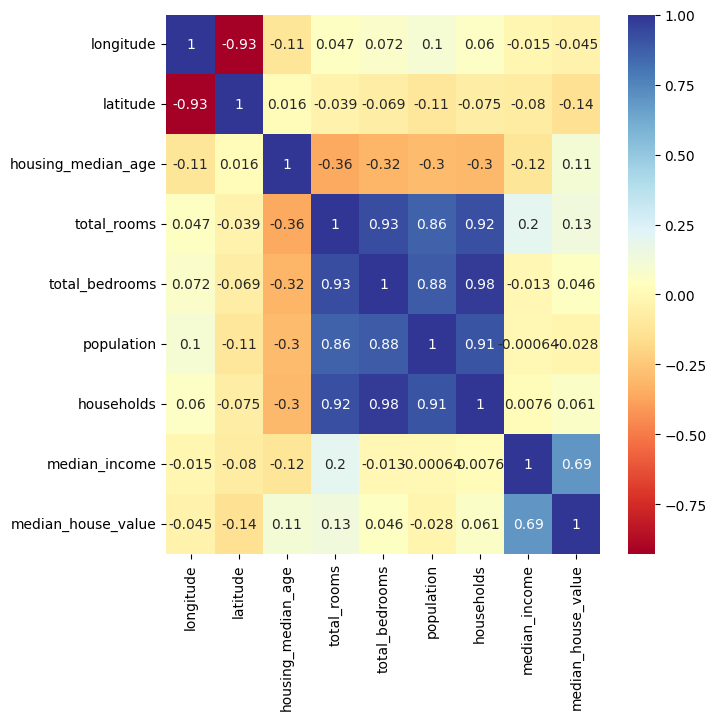

In [12]:
plt.figure(figsize=(7,7))
g = sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

[4] 탐색적 분석

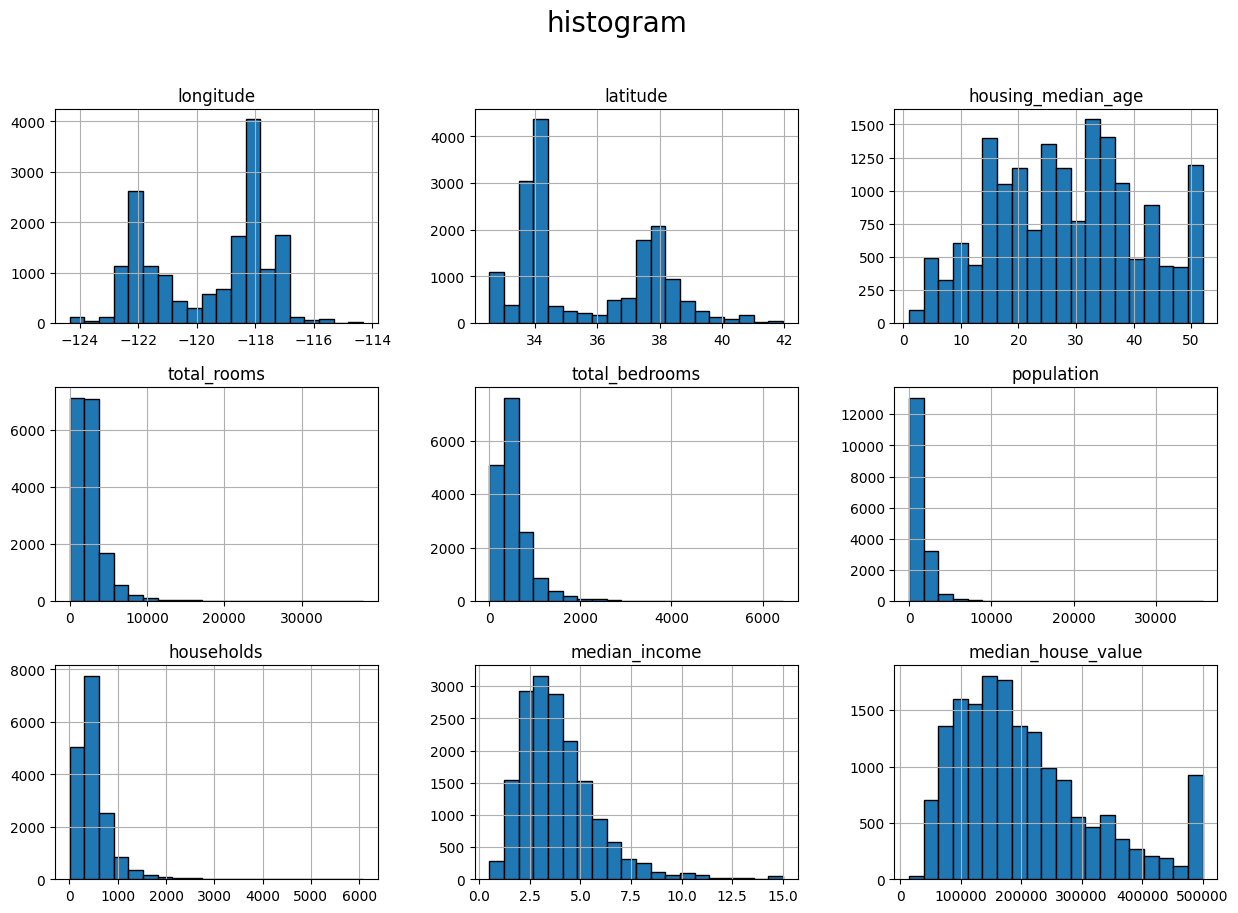

In [13]:
# 히스토그램
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('histogram', fontsize=20)
plt.show()


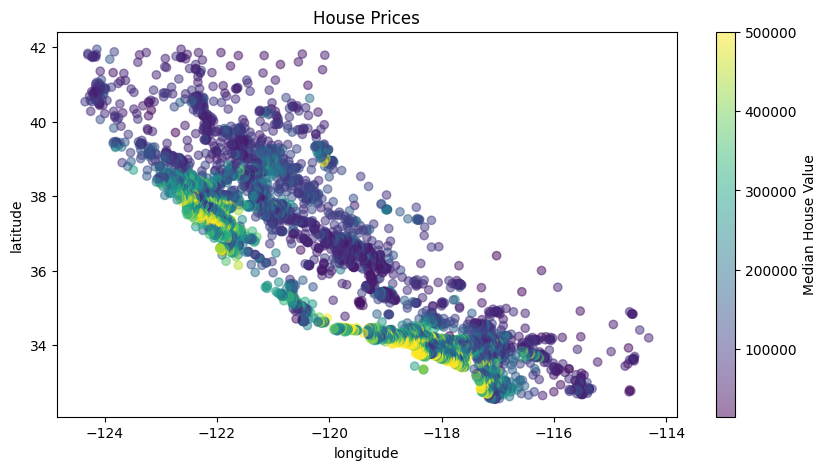

In [14]:
# 감사합니다 효준님..
# 지도 모양으로 시각화
plt.figure(figsize=(10, 5))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5, label = 'median_house_value')
plt.colorbar(label='Median House Value')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('House Prices')
plt.show()

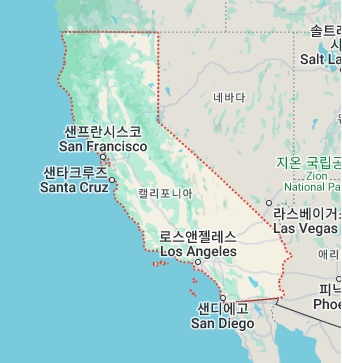

[5] 학습 준비

[5-1] 피쳐/타겟 설정

In [15]:
drop_house_df = df.drop(columns=['median_house_value'])
features = drop_house_df
target = df['median_house_value']
print(f'features : {features.shape}, {features.ndim}D')
print(f'target : {target.shape}, {target.ndim}D')

features : (17000, 8), 2D
target : (17000,), 1D


[5-2] 훈련/테스트 데이터 분리

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [18]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (13600, 8), 2D
y_train : (13600,), 1D
X_test : (3400, 8), 2D
y_test : (3400,), 1D


[5-3] 피쳐 스케일링

In [19]:
# 스탠다드 스캐일로 정규분포를 따르게 만듬
from sklearn.preprocessing import StandardScaler

In [20]:
# 인스턴스 생성
sScaler = StandardScaler()

In [21]:
sScaler.fit(X_train)

StandardScaler()

In [22]:
# 학습용데이터 스케일링 
X_train_scaled=sScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()
# 테스트데이터 스케일링
X_test_scaled=sScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((3400, 8), np.float64(-2.3223935145958383), np.float64(24.24246166389418))

[6] 모델생성

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# 객체생성
model = LinearRegression()

In [25]:
model.fit(X_train_scaled, y_train)

LinearRegression()

[7] 성능평가

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# 예측
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [28]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f' Train MSE: {train_mse:.2f}')
print(f' Train R2 score: {train_r2:.2f}')
print()
print(f' Test MSE: {test_mse:.2f}')
print(f' Test R2 score: {test_r2:.2f}')

 Train MSE: 4856819423.95
 Train R2 score: 0.64

 Test MSE: 4699346641.07
 Test R2 score: 0.65


[8] 예측값 시각화

In [29]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

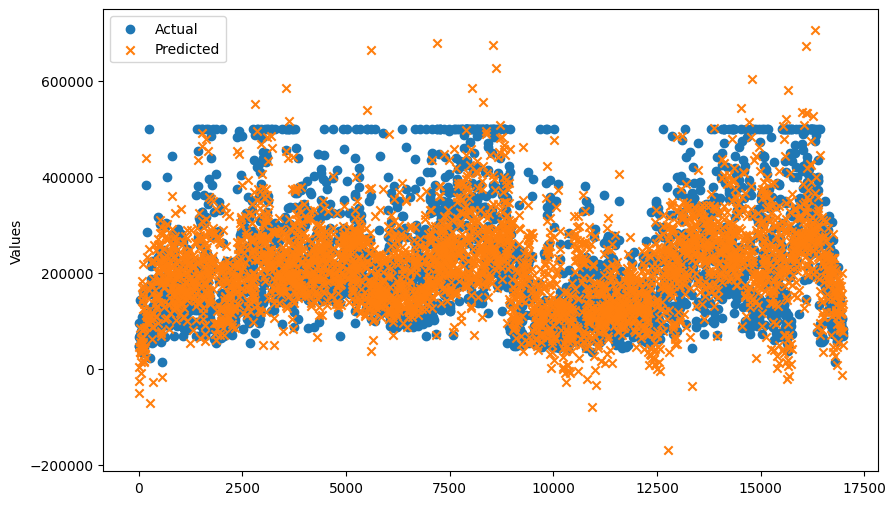

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results.index, df_results['Actual'], label='Actual', marker='o')
plt.scatter(df_results.index, df_results['Predicted'], label='Predicted', marker='x')
plt.ylabel('Values')
plt.legend()
plt.show()

[9] 모델 개선

[9-1] 다항 회귀

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [32]:
poly = make_pipeline(PolynomialFeatures(degree=2,include_bias=False), LinearRegression())

In [33]:
poly.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [34]:
#예측
y_train_pred_poly = poly.predict(X_train_scaled)
y_test_pred_poly = poly.predict(X_test_scaled)

In [35]:
poly_train_mse = mean_squared_error(y_train, y_train_pred_poly)
poly_rain_r2 = r2_score(y_train, y_train_pred_poly)

poly_test_mse = mean_squared_error(y_test, y_test_pred_poly)
poly_test_r2 = r2_score(y_test, y_test_pred_poly)

print(f' Poly Train MSE: {poly_train_mse:.2f}')
print(f' Poly Train R2 score: {poly_rain_r2:.2f}')
print()
print(f' Poly Test MSE: {poly_test_mse:.2f}')
print(f' Poly Test R2 score: {poly_test_r2:.2f}')

 Poly Train MSE: 3925154276.00
 Poly Train R2 score: 0.71

 Poly Test MSE: 4117123605.55
 Poly Test R2 score: 0.69


성능이 올랐다.

[9-2] 릿지 회귀

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge = Ridge()

In [38]:
ridge.fit(X_train_scaled, y_train)

Ridge()

In [39]:
#예측
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

In [40]:
ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)

ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print(f' ridge Train MSE: {ridge_train_mse:.2f}')
print(f' ridge Train R2 score: {ridge_train_r2:.2f}')
print()
print(f' ridge Test MSE: {ridge_test_mse:.2f}')
print(f' ridge Test R2 score: {ridge_test_r2:.2f}')

 ridge Train MSE: 4856821104.25
 ridge Train R2 score: 0.64

 ridge Test MSE: 4699272669.64
 ridge Test R2 score: 0.65


[9-3] 라쏘 회귀

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso = Lasso()

In [43]:
lasso.fit(X_train_scaled,y_train)

Lasso()

In [44]:
#예측
y_train_pred_lasso = ridge.predict(X_train_scaled)
y_test_pred_lasso = ridge.predict(X_test_scaled)

In [45]:
lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)

lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print(f' lasso Train MSE: {lasso_train_mse:.2f}')
print(f' lasso Train R2 score: {lasso_train_r2:.2f}')
print()
print(f' lasso Test MSE: {test_mse:.2f}')
print(f' lasso Test R2 score: {test_r2:.2f}')

 lasso Train MSE: 4856821104.25
 lasso Train R2 score: 0.64

 lasso Test MSE: 4699346641.07
 lasso Test R2 score: 0.65


[9-4] GridSearchCV

하이퍼파라미터 튜닝과 교차검증 동시에 진행

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Ridge의 Hyper-parameter 값 설정
params={'alpha':[0,0.1,0.5,1.0,10,100],
        'max_iter':[3, 5]}

In [48]:
# 인스턴스 생성
rModel=Ridge()
# GridSearchCV 인스턴스 생성
searchCV=GridSearchCV(rModel, params, cv=5, verbose=True, return_train_score=True, scoring='neg_mean_squared_error')


searchCV.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 0.5, 1.0, 10, 100],
                         'max_iter': [3, 5]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [49]:
best_model = searchCV.best_estimator_
best_model

Ridge(alpha=10, max_iter=3)

In [50]:
r2 = best_model.score(X_train_scaled, y_train)

In [51]:
print('best model parameter:', searchCV.best_params_)
print(f'best model MSE: {-searchCV.best_score_:.2f}')
print(f'best model R2: {r2:.2f}')

best model parameter: {'alpha': 10, 'max_iter': 3}
best model MSE: 4900231209.59
best model R2: 0.64


[9-5] ElasticNet

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
# Ridge의 Hyper-parameter 값 설정
params={'alpha':[0,0.1,0.5,1.0,10,100],
        'max_iter':[3, 5]}

In [54]:
# 인스턴스 생성
EModel=ElasticNet()
# GridSearchCV 인스턴스 생성
searchCV=GridSearchCV(EModel, params, cv=5, verbose=True, return_train_score=True, scoring='neg_mean_squared_error')


searchCV.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\새 폴더\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\새 폴더\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\새 폴더\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+13, tolerance: 1.462e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\새 폴더\Lib\site-packages\sklearn\base.p

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0, 0.1, 0.5, 1.0, 10, 100],
                         'max_iter': [3, 5]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [55]:
print('best model parameter:', searchCV.best_params_)
print(f'best model MSE: {-searchCV.best_score_:.2f}')
print(f'best model R2: {r2:.2f}')

best model parameter: {'alpha': 0, 'max_iter': 5}
best model MSE: 5211117986.72
best model R2: 0.64


다항 회귀 모델이 성능이 가장 좋게 나왔다.

In [56]:
print(f' Poly Train MSE: {poly_train_mse:.2f}')
print(f' Poly Train R2 score: {poly_rain_r2:.2f}')
print()
print(f' Poly Test MSE: {poly_test_mse:.2f}')
print(f' Poly Test R2 score: {poly_test_r2:.2f}')

 Poly Train MSE: 3925154276.00
 Poly Train R2 score: 0.71

 Poly Test MSE: 4117123605.55
 Poly Test R2 score: 0.69


# test CSV로 해보기

- 데이터셋: california_housing_test.csv
- 모델 : poly

[1] 데이터 전처리

In [57]:
file_path2 = 'california_housing_test.csv'

In [58]:
test_df = pd.read_csv(file_path2)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [62]:
# 깨끗한 데이터 이므로 그냥 진행

In [63]:
test_features = test_df.drop(columns=['median_house_value'])

피쳐스케일링

In [64]:
# 기존의 스케일링에 넣어주기
test_scaled = sScaler.transform(test_features)

[2] 집값 예측
- poly모델 사용

In [65]:
y_pred = poly.predict(test_scaled)

In [69]:
y_pred

array([377474.39854136, 210282.95280414, 264534.30976829, ...,
       104653.20547188, 119304.03253423, 540559.24897115])

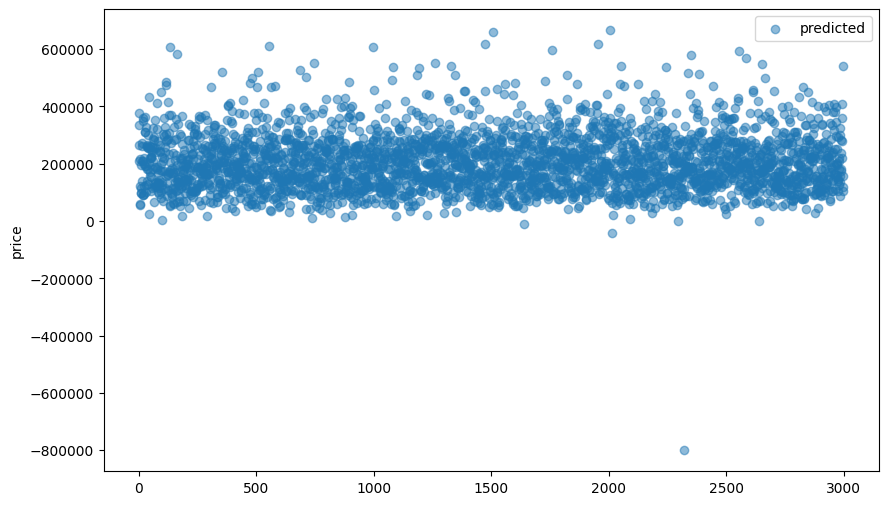

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, label='predicted' ,alpha=0.5)
plt.ylabel('price')
plt.legend()
plt.show()

[3] 3D로 시각화 해보기

In [71]:
test_df.loc[:,'Predicted_Price'] = y_pred

In [73]:
from mpl_toolkits.mplot3d import axes3d

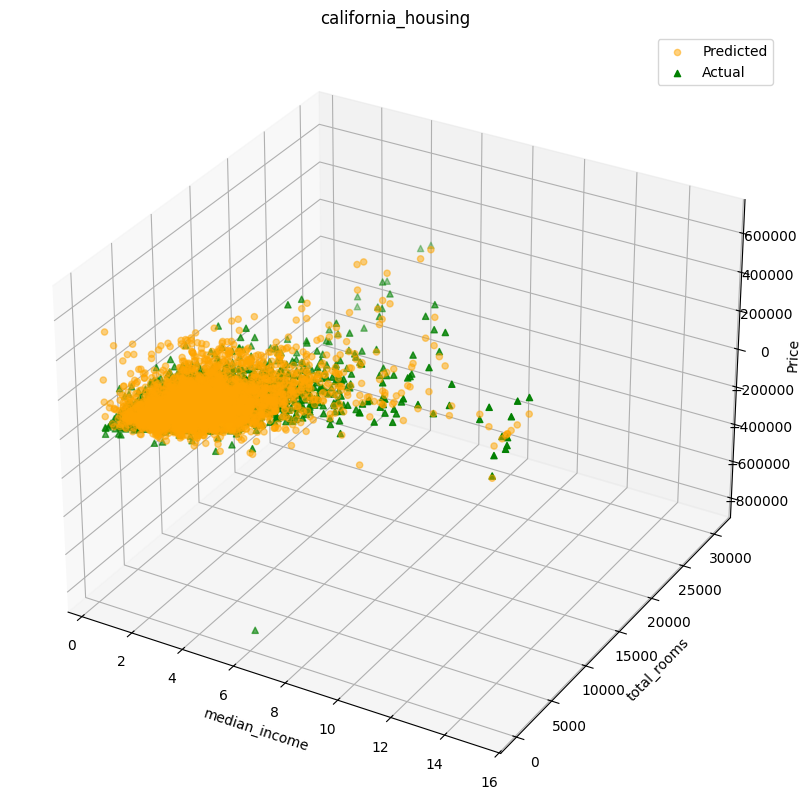

In [84]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(test_df['median_income'], test_df['total_rooms'], test_df['median_house_value'], c='orange',marker='o', alpha=0.5, label='Predicted')
ax.scatter(test_df['median_income'], test_df['total_rooms'], test_df['Predicted_Price'], c='g', marker='^', label='Actual')
ax.set_xlabel('median_income')
ax.set_ylabel('total_rooms')
ax.set_zlabel('Price')
ax.set_title('california_housing')
ax.legend()
plt.show()

성능이..? 좋아보이는것 같기도..?